In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Customer Info

In [2]:
customer_info_df = pd.read_excel('./data/dataset/CUSTOMER INFO_PJDSC.xlsx')
customer_info_df.head()

,CUST_NUM,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,IDV_OR_ORG,SEGMENT,SUBSEGMENT,GENDER,MARITAL_STATUS
0,11712.654012,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,20.0,1.833333,N,DIGITAL,ALLOWANCE,1,3,CORE MASS,MALE,SINGLE
1,436.605085,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,21.0,4.250000,N,NO_DATA,SALARY,1,3,CORE MASS,FEMALE,SINGLE
2,921.989154,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,23.0,2.000000,N,TRADITIONAL,ALLOWANCE,1,3,CORE MASS,MALE,SINGLE
3,1119.634762,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),LOW,13.0,5.583333,N,TRADITIONAL,ALLOWANCE,1,3,CORE MASS,MALE,SINGLE
4,1709.755538,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,20.0,1.250000,N,DIGITAL,SALARY,1,3,CORE MASS,FEMALE,SINGLE


In [3]:
customer_info_df.shape

(138444, 14)

In [4]:
customer_info_df.describe(include='all')

,CUST_NUM,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,IDV_OR_ORG,SEGMENT,SUBSEGMENT,GENDER,MARITAL_STATUS
count,138444.000000,138444,138444,138444,138378.000000,138444.000000,138444,138444,138444,138444.0,138444.0,138444,138444,138444
unique,NaN,45,14,4,NaN,NaN,2,3,12,NaN,NaN,1,3,6
top,NaN,NEGROS OCCIDENTAL,REGION VI (WESTERN VISAYAS),MID,NaN,NaN,N,TRADITIONAL,SALARY,NaN,NaN,CORE MASS,FEMALE,SINGLE
freq,NaN,13488,20508,63396,NaN,NaN,131553,64695,84531,NaN,NaN,138444,80298,80310
mean,9424.785491,NaN,NaN,NaN,40.255496,6.280592,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN
std,3337.146487,NaN,NaN,NaN,15.712651,5.241069,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
min,85.229103,NaN,NaN,NaN,1.000000,0.083333,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN
25%,7064.942498,NaN,NaN,NaN,28.000000,2.166667,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN
50%,10000.653129,NaN,NaN,NaN,36.000000,5.083333,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN
75%,12247.160446,NaN,NaN,NaN,49.000000,9.000000,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN


In [5]:
customer_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138444 entries, 0 to 138443
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CUST_NUM        138444 non-null  float64
 1   PROVINCE        138444 non-null  object 
 2   REGION          138444 non-null  object 
 3   EDUCATION       138444 non-null  object 
 4   AGE             138378 non-null  float64
 5   TENURE          138444 non-null  float64
 6   BUSINESS_OWNER  138444 non-null  object 
 7   DIGITAL_FLAG    138444 non-null  object 
 8   INCOME_SOURCE   138444 non-null  object 
 9   IDV_OR_ORG      138444 non-null  int64  
 10  SEGMENT         138444 non-null  int64  
 11  SUBSEGMENT      138444 non-null  object 
 12  GENDER          138444 non-null  object 
 13  MARITAL_STATUS  138444 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 14.8+ MB


We check if there are `NULL` values on any feature.

As we can see, the `age` feature contains `NULL` values but this doesn't mean that the other features won't contain `NULL` data.

In [6]:
customer_info_df.nunique()

CUST_NUM          46148
PROVINCE             45
REGION               14
EDUCATION             4
AGE                 106
TENURE              307
BUSINESS_OWNER        2
DIGITAL_FLAG          3
INCOME_SOURCE        12
IDV_OR_ORG            1
SEGMENT               1
SUBSEGMENT            1
GENDER                3
MARITAL_STATUS        6
dtype: int64

In [7]:
customer_info_df.drop(labels=['IDV_OR_ORG', 'SEGMENT', 'SUBSEGMENT'], axis=1, inplace=True)

From here, we remove all features that only contains one value.

In [8]:
customer_info_df.nunique()

CUST_NUM          46148
PROVINCE             45
REGION               14
EDUCATION             4
AGE                 106
TENURE              307
BUSINESS_OWNER        2
DIGITAL_FLAG          3
INCOME_SOURCE        12
GENDER                3
MARITAL_STATUS        6
dtype: int64

It is worth-noting that the `CUST_NUM` feature is not unique to all 138444 customers.

# Preliminary Analysis

### Province

In [10]:
customer_info_df['PROVINCE'].value_counts()

PROVINCE
NEGROS OCCIDENTAL                 13488
MISAMIS ORIENTAL                   9783
PANGASINAN                         8841
BENGUET                            8214
ZAMBALES                           5742
ZAMBOANGA DEL SUR                  5310
SOUTH COTABATO                     5262
NEGROS ORIENTAL                    5034
LEYTE                              4845
NUEVA ECIJA                        4836
BOHOL                              4206
CAMARINES SUR                      4044
TARLAC                             4020
ISABELA                            3792
ALBAY                              3546
LA UNION                           3462
DAVAO DEL NORTE                    3432
ILOCOS NORTE                       3363
CAGAYAN                            3111
AKLAN                              3102
BATAAN                             2727
CAPIZ                              2634
LANAO DEL NORTE                    2460
PALAWAN                            2397
AGUSAN DEL NORTE               

Based from the values taken by the `province` feature, we can see that there are some interesting values that were inputted from customer inputs such as SAMAR (WESTERN SAMAR), COTABATO (NORTH COTABATO) and COTABATO CITY (NOT A PROVINCE). We can map SAMAR (WESTERN SAMAR) into WESTERN SAMAR and COTABATO (NORTH COTABATO) into NORTH COTABATO.

For the case of COTABATO CITY, we included it as a province since there might be misrepresentations that may occur for that province.

In [11]:
province_mapper = {'SAMAR (WESTERN SAMAR)': 'WESTERN SAMAR', 'COTABATO (NORTH COTABATO)': 'NORTH COTABATO', 'COTABATO CITY (NOT A PROVINCE)': 'COTABATO CITY'}
for i in customer_info_df['PROVINCE'].unique():
    if not i in province_mapper:
        province_mapper[i] = i
customer_info_df['PROVINCE'] = customer_info_df['PROVINCE'].map(province_mapper)

In [12]:
customer_info_df['PROVINCE'].value_counts()

PROVINCE
NEGROS OCCIDENTAL      13488
MISAMIS ORIENTAL        9783
PANGASINAN              8841
BENGUET                 8214
ZAMBALES                5742
ZAMBOANGA DEL SUR       5310
SOUTH COTABATO          5262
NEGROS ORIENTAL         5034
LEYTE                   4845
NUEVA ECIJA             4836
BOHOL                   4206
CAMARINES SUR           4044
TARLAC                  4020
ISABELA                 3792
ALBAY                   3546
LA UNION                3462
DAVAO DEL NORTE         3432
ILOCOS NORTE            3363
CAGAYAN                 3111
AKLAN                   3102
BATAAN                  2727
CAPIZ                   2634
LANAO DEL NORTE         2460
PALAWAN                 2397
AGUSAN DEL NORTE        2364
BUKIDNON                2319
ILOCOS SUR              1893
MISAMIS OCCIDENTAL      1497
ZAMBOANGA DEL NORTE     1320
ANTIQUE                 1284
NORTH COTABATO          1191
NUEVA VIZCAYA           1119
CAMARINES NORTE         1098
SURIGAO DEL NORTE       1068
ORIEN

In [52]:
customer_info_df['PROVINCE'], province_uniques = customer_info_df['PROVINCE'].factorize()

In [53]:
customer_info_df['PROVINCE'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype=int64)

### Region

In [13]:
customer_info_df['REGION'].value_counts()

REGION
REGION VI (WESTERN VISAYAS)               20508
REGION I (ILOCOS REGION)                  17559
REGION III (CENTRAL LUZON)                17325
REGION X (NORTHERN MINDANAO)              16059
REGION V (BICOL REGION)                    9633
REGION VII (CENTRAL VISAYAS)               9240
CORDILLERA ADMINISTRATIVE REGION (CAR)     8214
REGION II (CAGAYAN VALLEY)                 8022
REGION XII (SOCCSKSARGEN)                  7932
REGION IX (ZAMBOANGA PENINSULA)            6630
REGION VIII (EASTERN VISAYAS)              5844
REGION XIII (CARAGA)                       4143
REGION XI (DAVAO REGION)                   3885
MIMAROPA REGION                            3450
Name: count, dtype: int64

There are also minor modifications that can be done for the `region` feature.

In [14]:
region_mapper = {'MIMAROPA REGION': 'REGION IV-B (MIMAROPA REGION)'}
for i in customer_info_df['REGION'].unique():
    if not i in region_mapper:
        region_mapper[i] = i
customer_info_df['REGION'] = customer_info_df['REGION'].map(region_mapper)

In [15]:
customer_info_df['REGION'].value_counts()

REGION
REGION VI (WESTERN VISAYAS)               20508
REGION I (ILOCOS REGION)                  17559
REGION III (CENTRAL LUZON)                17325
REGION X (NORTHERN MINDANAO)              16059
REGION V (BICOL REGION)                    9633
REGION VII (CENTRAL VISAYAS)               9240
CORDILLERA ADMINISTRATIVE REGION (CAR)     8214
REGION II (CAGAYAN VALLEY)                 8022
REGION XII (SOCCSKSARGEN)                  7932
REGION IX (ZAMBOANGA PENINSULA)            6630
REGION VIII (EASTERN VISAYAS)              5844
REGION XIII (CARAGA)                       4143
REGION XI (DAVAO REGION)                   3885
REGION IV-B (MIMAROPA REGION)              3450
Name: count, dtype: int64

In [54]:
customer_info_df['REGION'], region_uniques = customer_info_df['REGION'].factorize()

### Education

In [58]:
customer_info_df['EDUCATION'].value_counts()

EDUCATION
1.0    102816
0.0     32364
2.0      2598
Name: count, dtype: int64

As we can see from the count, we might need to impute the missing values for the `education` feature.

In [17]:
education_mapper = {'LOW': 0, 'MID': 1, 'HIGH': 2, 'NO_DATA': np.nan}

In [18]:
customer_info_df['EDUCATION'] = customer_info_df['EDUCATION'].map(education_mapper)

In [19]:
customer_info_df['EDUCATION'].fillna(1, inplace=True)
customer_info_df['EDUCATION'].value_counts()

EDUCATION
1.0    103086
0.0     32748
2.0      2610
Name: count, dtype: int64

### Age

We first up all `NaN` values using the mean value of the `AGE` feature.

In [29]:
customer_info_df['AGE'] = customer_info_df['AGE'].fillna(int(customer_info_df['AGE'].mean()))

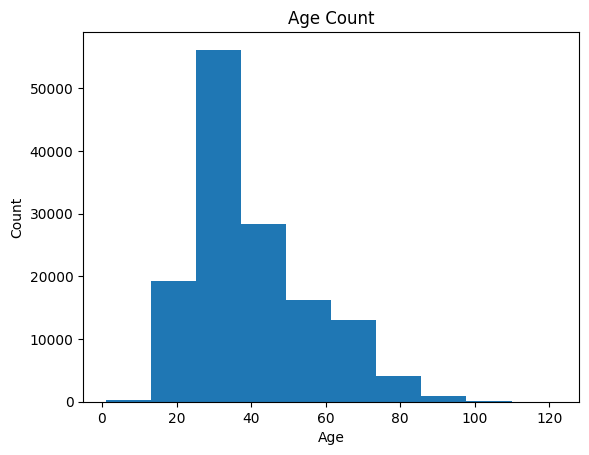

In [30]:
customer_info_df['AGE'].hist()
plt.title('Age Count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(False)
plt.show()

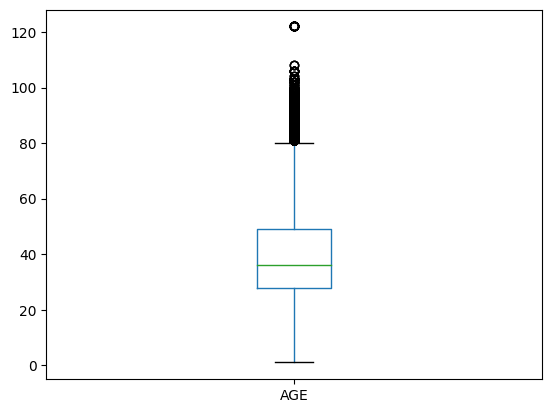

In [31]:
customer_info_df.boxplot(column=['AGE'])
plt.grid(False)
plt.show()

We remove outliers using the z-score.

In [33]:
z_scores = np.abs(stats.zscore(customer_info_df['AGE']))
threshold = 3 # Default std outlier
customer_info_df = customer_info_df[z_scores <= threshold]

In [35]:
customer_info_df['AGE'].describe()

count    137787.000000
mean         40.001132
std          15.299970
min           1.000000
25%          28.000000
50%          36.000000
75%          49.000000
max          87.000000
Name: AGE, dtype: float64

We might also need to consider the validity of age values that were inputted by the users. The earliest age that a child can have, with parental guidance, to create a bank account is 5 years old (Source: https://www.banksphilippines.com/2022/10/age-to-open-a-bank-account.html). Considering this, we should also count all accounts whose `AGE` value is less than 5 years old as outliers.

In [36]:
customer_info_df = customer_info_df[customer_info_df['AGE'] >= 5]
customer_info_df['AGE'].describe()

count    137778.000000
mean         40.003571
std          15.297491
min           5.000000
25%          28.000000
50%          36.000000
75%          49.000000
max          87.000000
Name: AGE, dtype: float64

## Tenure

In [25]:
customer_info_df['tenure'].value_counts()

tenure
0.916667     1833
0.333333     1797
0.833333     1785
0.750000     1773
0.666667     1755
             ... 
27.000000       3
25.833333       3
26.583333       3
26.916667       3
23.083333       3
Name: count, Length: 307, dtype: int64

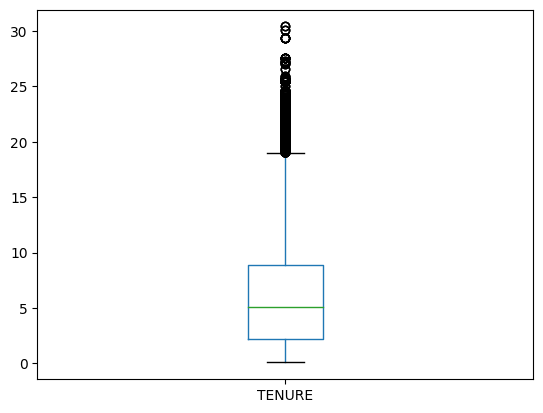

In [50]:
customer_info_df.boxplot(column=['TENURE'])
plt.grid(False)
plt.show()

The boxplot above shows 

## Business Owner

In [47]:
customer_info_df['BUSINESS_OWNER'], busown_uniques = customer_info_df['BUSINESS_OWNER'].factorize()

In [48]:
customer_info_df['BUSINESS_OWNER'].value_counts()

BUSINESS_OWNER
0    130899
1      6879
Name: count, dtype: int64

In [49]:
busown_uniques

Index([0, 1], dtype='int64')

## Digital Flag

In [27]:
customer_info_df['DIGITAL_FLAG'].value_counts()

digital_flag
TRADITIONAL    64695
NO_DATA        41775
DIGITAL        31974
Name: count, dtype: int64

From the definitions given from, `NO_DATA` is a valid value so we won't count it as a new category.

In [80]:
customer_info_df['DIGITAL_FLAG'], digfla_unique = customer_info_df['DIGITAL_FLAG'].factorize()

In [81]:
customer_info_df.head()

,CUST_NUM,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,GENDER,MARITAL_STATUS
0,11712.654012,0,0,1.0,20.0,1.833333,0,0,0,0,0
1,436.605085,0,0,1.0,21.0,4.250000,0,1,1,1,0
2,921.989154,0,0,1.0,23.0,2.000000,0,2,0,0,0
3,1119.634762,0,0,0.0,13.0,5.583333,0,2,0,0,0
4,1709.755538,0,0,1.0,20.0,1.250000,0,0,1,1,0


In [82]:
digfla_unique

Index(['DIGITAL', 'NO_DATA', 'TRADITIONAL'], dtype='object')

## Income Source

In [28]:
customer_info_df['INCOME_SOURCE'].value_counts()

income_source
SALARY                                     84531
ALLOWANCE                                  18357
PENSION                                    11055
REMITTANCE                                 10581
BUSINESS                                    7818
OTHER_SOURCES_NOT_SPECIFIED                 2181
NO_DATA                                     1830
COMMISSION                                  1533
ECONOMICALLY_INACTIVE                        300
INTEREST_SAVINGS_PLACEMENTS_INVESTMENTS      234
DONATION                                      21
CAMPAIGN_FUND                                  3
Name: count, dtype: int64

Note the unique values that the `INCOME_SOURCE` feature takes. Almost all except two pertains to specific income sources. The `OTHER_SOURCES_NOT_SPECIFIED` and `NO_DATA` income source values does not specify any known income source so what we can do here is we group them as one new income source called `OTHERS`.

In [77]:
income_source_mapper = {'NO_DATA': 'OTHERS', 'OTHER_SOURCES_NOT_SPECIFIED': 'OTHERS'}
for i in customer_info_df['INCOME_SOURCE'].unique():
    if not i in income_source_mapper:
        income_source_mapper[i] = i
customer_info_df['INCOME_SOURCE'] = customer_info_df['INCOME_SOURCE'].map(income_source_mapper)

In [78]:
customer_info_df['INCOME_SOURCE'], incsou_unique = customer_info_df['INCOME_SOURCE'].factorize()

In [79]:
customer_info_df.head()

,CUST_NUM,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,GENDER,MARITAL_STATUS
0,11712.654012,0,0,1.0,20.0,1.833333,0,DIGITAL,0,0,0
1,436.605085,0,0,1.0,21.0,4.250000,0,NO_DATA,1,1,0
2,921.989154,0,0,1.0,23.0,2.000000,0,TRADITIONAL,0,0,0
3,1119.634762,0,0,0.0,13.0,5.583333,0,TRADITIONAL,0,0,0
4,1709.755538,0,0,1.0,20.0,1.250000,0,DIGITAL,1,1,0


## Gender

In [42]:
customer_info_df['GENDER'].value_counts()

GENDER
FEMALE    79872
MALE      55146
OTHERS     2760
Name: count, dtype: int64

In [43]:
customer_info_df['GENDER'], gender_uniques = customer_info_df['GENDER'].factorize()

In [45]:
customer_info_df['GENDER'].value_counts()

GENDER
1    79872
0    55146
2     2760
Name: count, dtype: int64

In [46]:
gender_uniques

Index(['MALE', 'FEMALE', 'OTHERS'], dtype='object')

## Marital Status

In [37]:
customer_info_df['MARITAL_STATUS'].value_counts()

MARITAL_STATUS
SINGLE       79953
MARRIED      48198
WIDOWED       4113
DIVORCED      2760
SEPARATED     1392
OTHERS        1362
Name: count, dtype: int64

In [38]:
customer_info_df['MARITAL_STATUS'], marstat_uniques = customer_info_df['MARITAL_STATUS'].factorize()

In [40]:
customer_info_df['MARITAL_STATUS'].value_counts()

MARITAL_STATUS
0    79953
1    48198
2     4113
3     2760
5     1392
4     1362
Name: count, dtype: int64

In [41]:
marstat_uniques

Index(['SINGLE', 'MARRIED', 'WIDOWED', 'DIVORCED', 'OTHERS', 'SEPARATED'], dtype='object')

## Additional Preprocessing

In [83]:
customer_info_df.drop_duplicates(inplace=True)

In [84]:
customer_info_df.shape

(45926, 11)

Save preprocessed and cleaned dataset into a new CSV file.

In [86]:
customer_info_df.to_csv('CUSTOMER_INFO_CLEANED.csv', sep=',')

# Bivariate Analysis

In [55]:
customer_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137778 entries, 0 to 138443
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CUST_NUM        137778 non-null  float64
 1   PROVINCE        137778 non-null  int64  
 2   REGION          137778 non-null  int64  
 3   EDUCATION       137778 non-null  float64
 4   AGE             137778 non-null  float64
 5   TENURE          137778 non-null  float64
 6   BUSINESS_OWNER  137778 non-null  int64  
 7   DIGITAL_FLAG    137778 non-null  object 
 8   INCOME_SOURCE   137778 non-null  object 
 9   GENDER          137778 non-null  int64  
 10  MARITAL_STATUS  137778 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 12.6+ MB


In [35]:
customer_info_df.corr(method='pearson', numeric_only=True)

,cust_num,education,age,tenure,business_owner,gender,marital_status
cust_num,1.000000,-0.003940,0.002227,0.005340,0.001467,0.009125,0.006144
education,-0.003940,1.000000,-0.068130,-0.086695,-0.006109,0.001954,0.027381
age,0.002227,-0.068130,1.000000,0.461876,0.124741,-0.000815,0.070514
tenure,0.005340,-0.086695,0.461876,1.000000,0.119844,-0.000748,0.038517
business_owner,0.001467,-0.006109,0.124741,0.119844,1.000000,-0.006401,0.016540
gender,0.009125,0.001954,-0.000815,-0.000748,-0.006401,1.000000,0.003757
marital_status,0.006144,0.027381,0.070514,0.038517,0.016540,0.003757,1.000000


<Axes: >

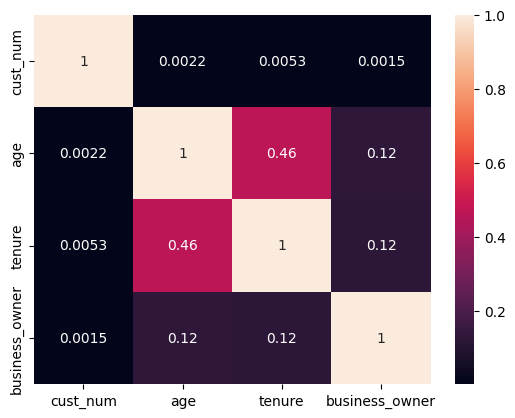

In [79]:
sns.heatmap(data=customer_info_df.corr(method='pearson', numeric_only=True), annot=True)

Need nga imap lahat ng categorical variables para macorrelate.